In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data spliting
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("titanic.csv")  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
null_percentage = df.isnull().mean() * 100
print(null_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [7]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

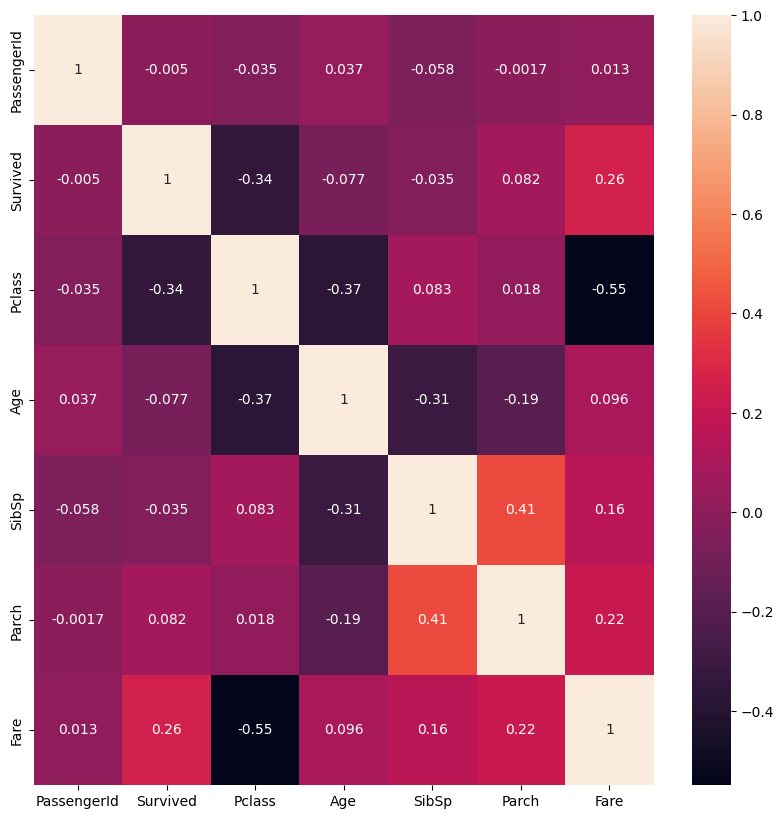

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [9]:
 df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df['Embarked'].fillna((df['Embarked'].mode()[0]), inplace=True)
df.head()

C:\Users\user_2\AppData\Local\Temp\ipykernel_21972\1004944161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna((df['Embarked'].mode()[0]), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [12]:
embarked_percentages = df['Embarked'].value_counts(normalize=True) * 100
print(embarked_percentages)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: proportion, dtype: float64


<Axes: xlabel='Embarked', ylabel='proportion'>

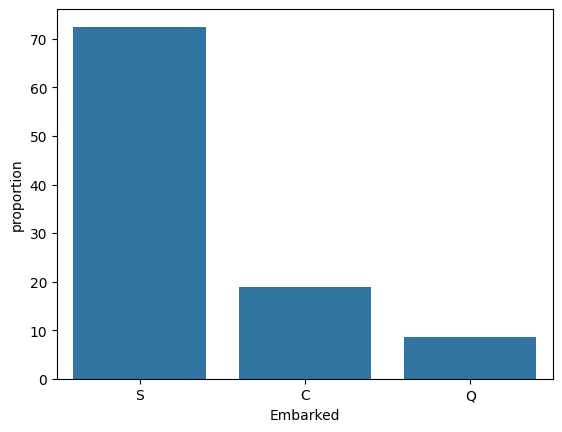

In [13]:
sns.barplot(data=embarked_percentages, )

In [14]:
df['Embarked']=df['Embarked'].map({'S':1, 'C':2, 'Q':3})

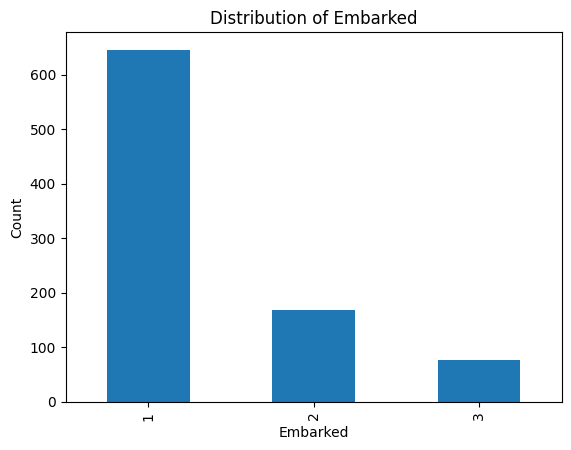

In [15]:
df['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')
plt.show()

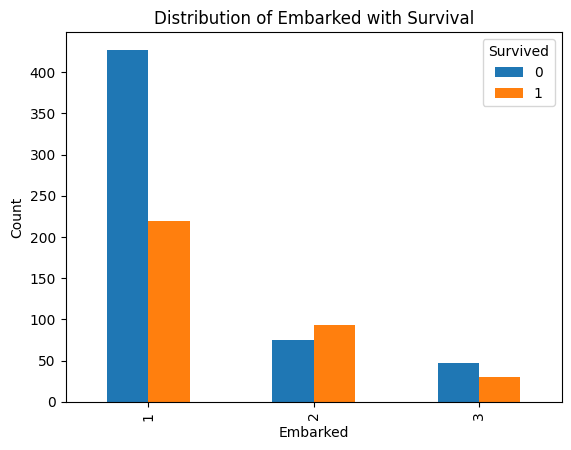

In [16]:
df_grouped = df.groupby(['Embarked', 'Survived']).size().unstack()

df_grouped.plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked with Survival')
plt.legend(title='Survived')
plt.show()

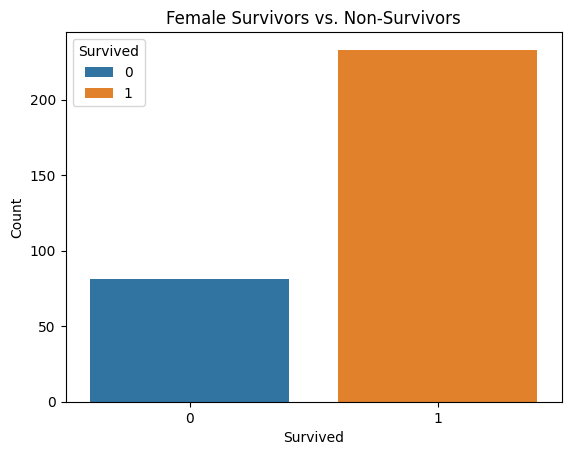

In [17]:
female_data = df[df['Sex'] == 'female']
sns.countplot(data=female_data, x='Survived', hue='Survived')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Female Survivors vs. Non-Survivors')
plt.show()

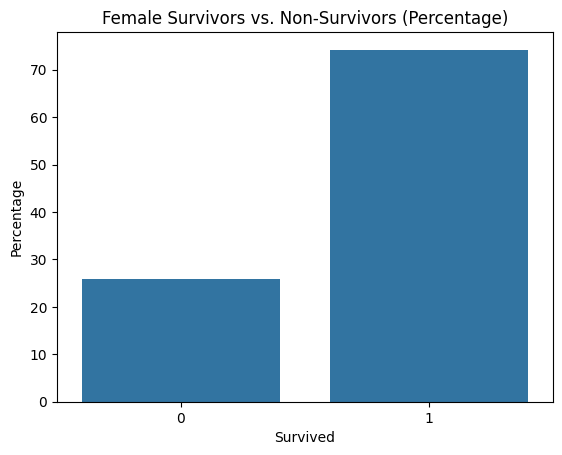

In [18]:
survival_percentages = female_data['Survived'].value_counts(normalize=True) * 100
sns.barplot(x=survival_percentages.index, y=survival_percentages.values)

plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.title('Female Survivors vs. Non-Survivors (Percentage)')

plt.show()

<Axes: xlabel='Survived', ylabel='count'>

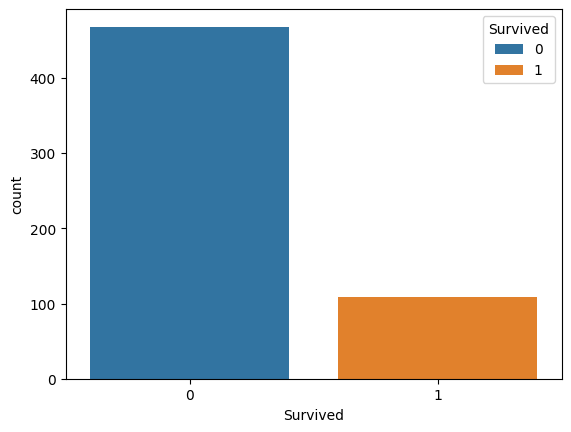

In [19]:
male_data = df[df['Sex'] == 'male']
sns.countplot(data=male_data, x='Survived', hue='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

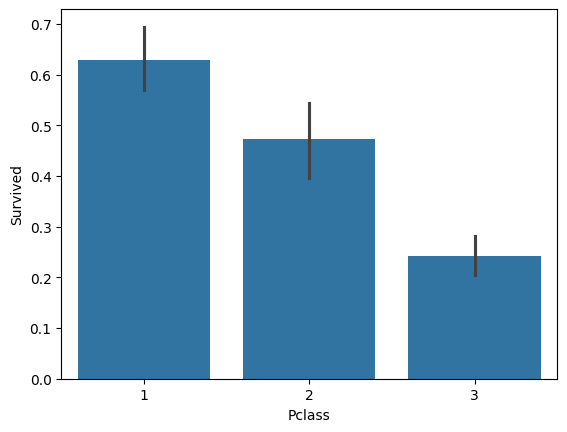

In [20]:
sns.barplot(x='Pclass', y='Survived', data=df)

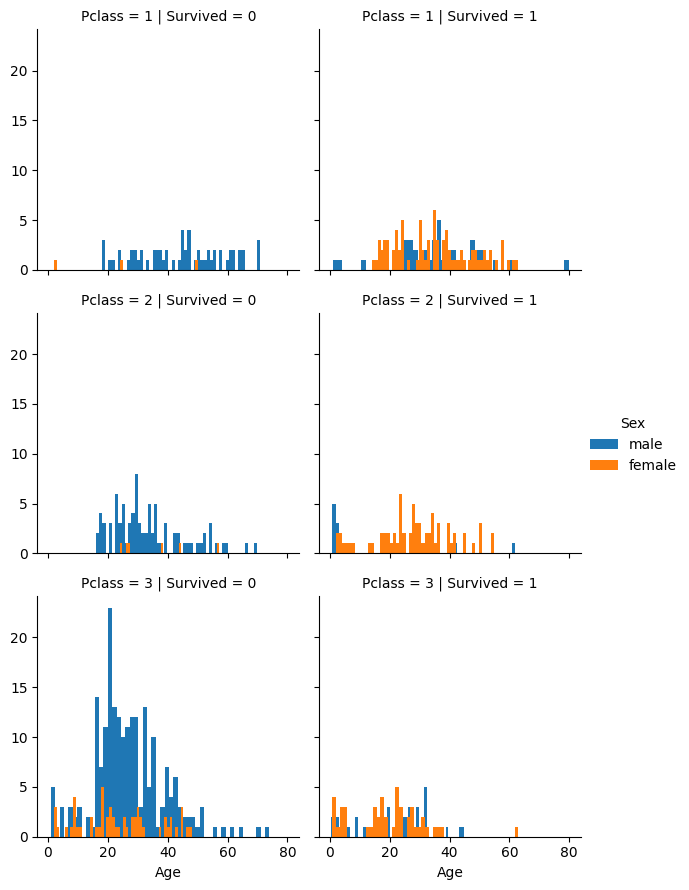

In [21]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', hue='Sex')
grid.map(plt.hist, 'Age', bins=50)
grid.add_legend()
plt.show()

In [22]:
df["Age"] = df["Age"].fillna(df.groupby(["Sex", "Pclass"])["Age"].transform("median"))

In [23]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 25.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 30.  , 31.  , 21.5 , 34.  ,
       15.  , 28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,
        3.  ,  7.  , 49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  ,
       17.  , 32.  , 16.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

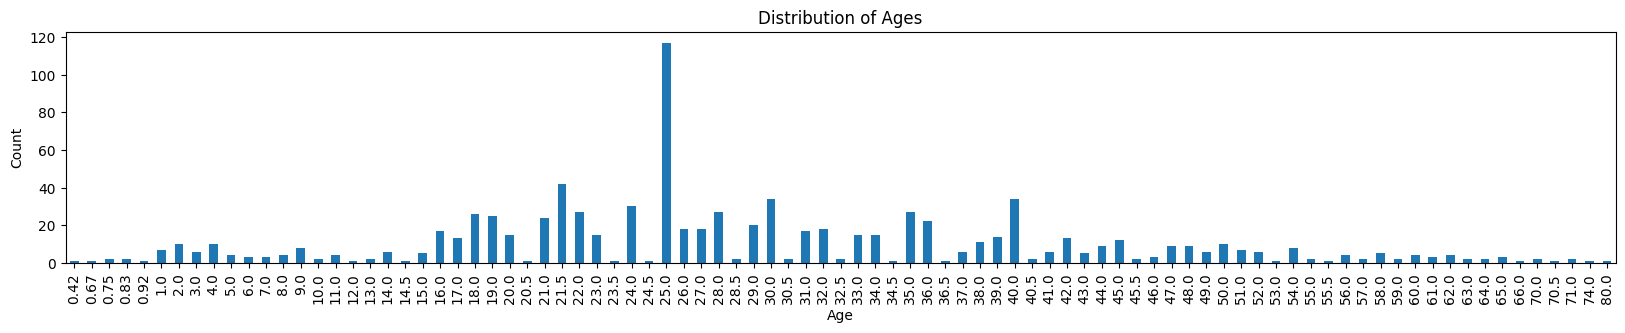

In [24]:
df['Age'].value_counts().sort_index().plot(kind='bar', figsize=(20, 3))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

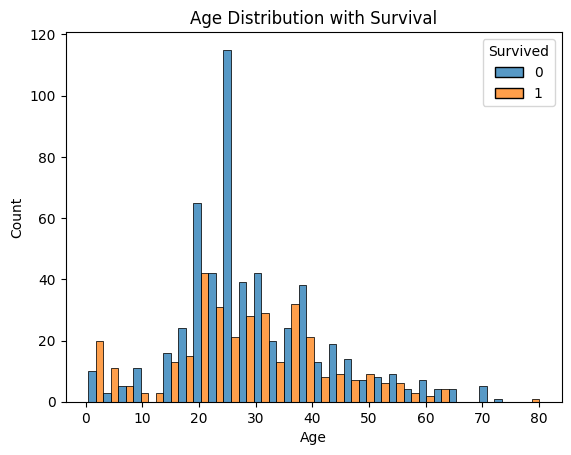

In [25]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='dodge', bins=30)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution with Survival')
plt.show()

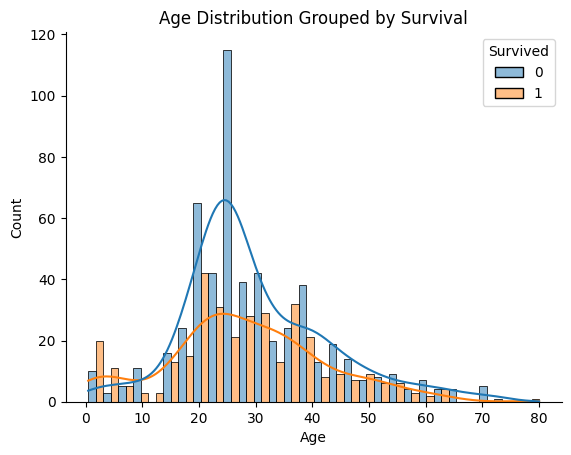

In [26]:
sns.histplot(data=df, x="Age", hue="Survived", multiple="dodge", bins=30, kde=True)
sns.despine()

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution Grouped by Survival")
plt.show()

In [27]:
df['NewAge']=pd.cut(df['Age'],
                    bins=[0,12,35,45,60,100],
                    labels=[1,2,3,4,5])

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,2


In [29]:
df['NewAge'].value_counts()

NewAge
2    584
3    135
4     81
1     69
5     22
Name: count, dtype: int64

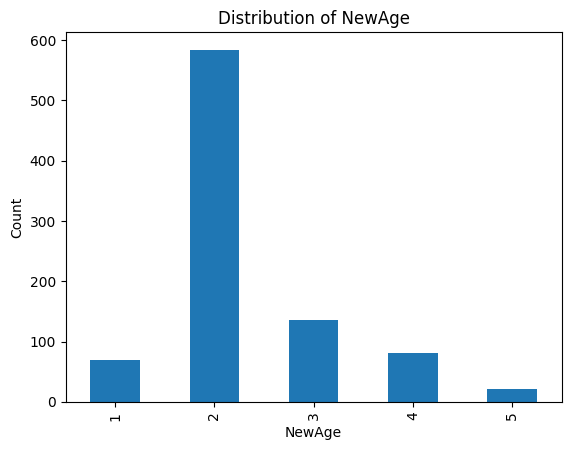

In [30]:
df['NewAge'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('NewAge')
plt.ylabel('Count')
plt.title('Distribution of NewAge')
plt.show()


C:\Users\user_2\AppData\Local\Temp\ipykernel_21972\1074427001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_counts = df.groupby(['NewAge', 'Survived']).size().unstack()


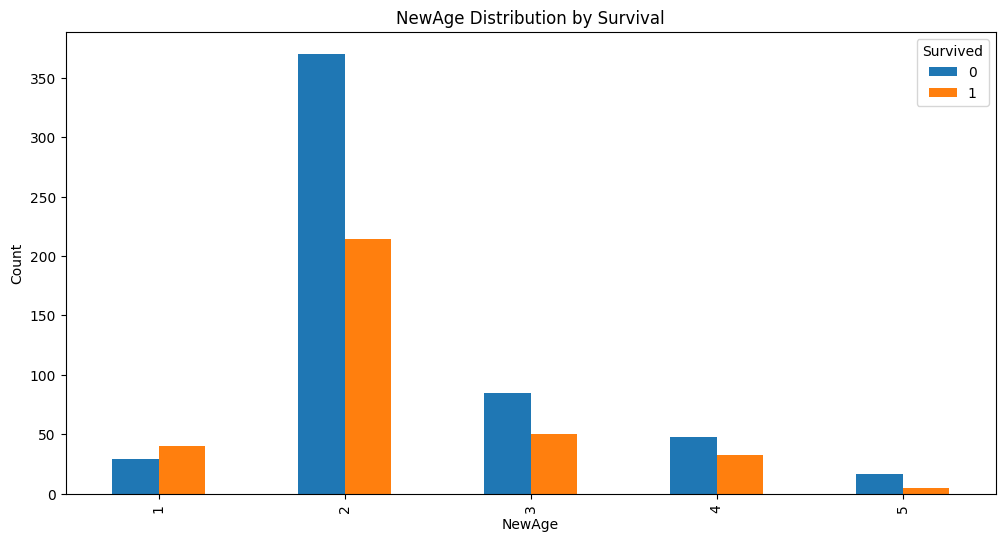

In [31]:
age_survival_counts = df.groupby(['NewAge', 'Survived']).size().unstack()
age_survival_counts.plot(kind='bar', figsize=(12, 6))

plt.xlabel('NewAge')
plt.ylabel('Count')
plt.title('NewAge Distribution by Survival')
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

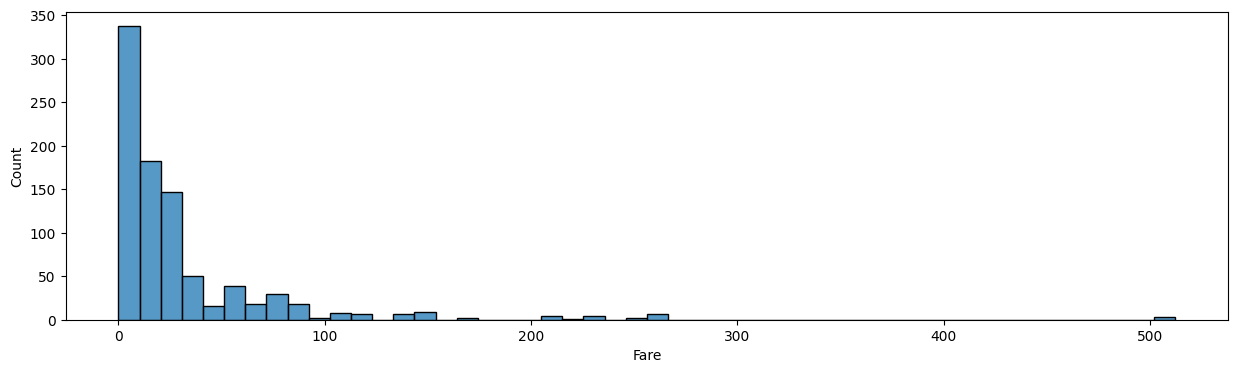

In [32]:
plt.figure(figsize=(15,4))
sns.histplot(df['Fare'], bins=50,)

C:\Users\user_2\AppData\Local\Temp\ipykernel_21972\656677179.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_pclass_counts = df.groupby(['NewAge', 'Survived', 'Pclass']).size().unstack().unstack()


Pclass     1       2        3    
Survived   0   1   0   1    0   1
NewAge                           
1          1   3   0  17   28  20
2         17  70  66  51  287  93
3         30  33  15  12   40   5
4         21  27  14   6   13   0
5         11   3   2   1    4   1


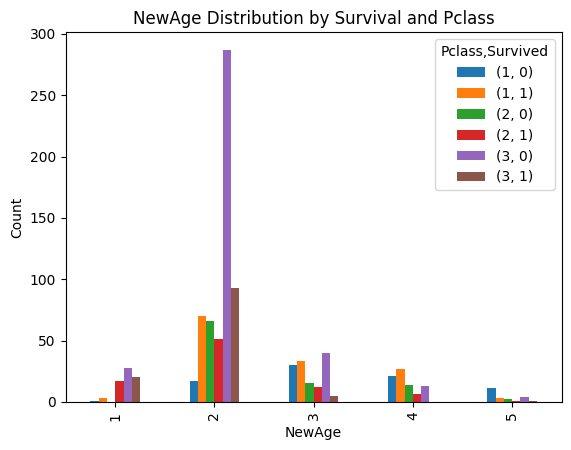

In [33]:
age_survival_pclass_counts = df.groupby(['NewAge', 'Survived', 'Pclass']).size().unstack().unstack()
print(age_survival_pclass_counts)
age_survival_pclass_counts.plot(kind='bar')

plt.xlabel('NewAge')
plt.ylabel('Count')
plt.title('NewAge Distribution by Survival and Pclass')
plt.show()

In [34]:
df['NewFare'] = pd.cut(df['Fare'],
                       bins=[0, 7, 15, 30, 60, float('inf')],
                       labels=[1, 2, 3, 4, 5],
                       right=False)

In [35]:
df['NewFare'].value_counts()

NewFare
2    429
3    194
5    122
4    118
1     28
Name: count, dtype: int64

<Axes: xlabel='NewFare', ylabel='count'>

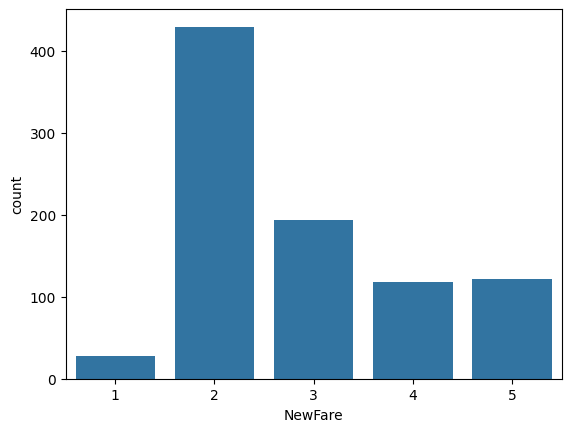

In [36]:
sns.countplot(x=df['NewFare'])

In [37]:
df['NewFare'].unique()

[2, 5, 4, 3, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,3,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,2,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,2,2


In [39]:
grouped_df = df.groupby(['Pclass', 'NewFare']).size().reset_index(name='Count')
print(grouped_df)

    Pclass NewFare  Count
0        1       1      6
1        1       2      0
2        1       3     36
3        1       4     66
4        1       5    108
5        2       1      6
6        2       2     88
7        2       3     65
8        2       4     18
9        2       5      7
10       3       1     16
11       3       2    341
12       3       3     93
13       3       4     34
14       3       5      7


C:\Users\user_2\AppData\Local\Temp\ipykernel_21972\2751560573.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Pclass', 'NewFare']).size().reset_index(name='Count')


C:\Users\user_2\AppData\Local\Temp\ipykernel_21972\1596198194.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Pclass', 'NewFare']).size().reset_index(name='Count')


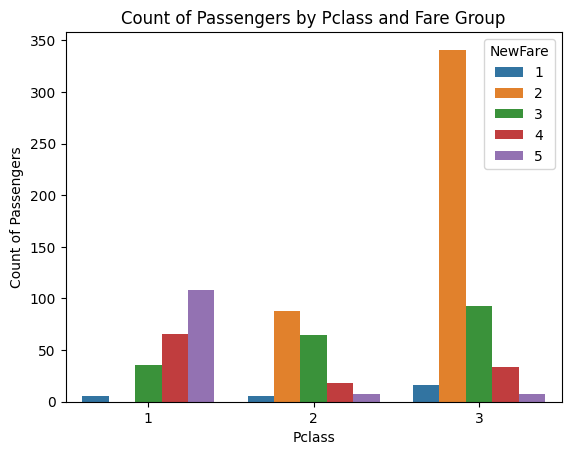

In [40]:
grouped_df = df.groupby(['Pclass', 'NewFare']).size().reset_index(name='Count')

sns.barplot(data=grouped_df, x='Pclass', y='Count', hue='NewFare')

plt.xlabel('Pclass')
plt.ylabel('Count of Passengers')
plt.title('Count of Passengers by Pclass and Fare Group')
plt.show()

In [41]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})

In [42]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [43]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [44]:
df['NewCabin'] = df['Cabin'].str[0]

In [45]:
df['NewCabin'].value_counts()

NewCabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

<Axes: xlabel='NewCabin', ylabel='count'>

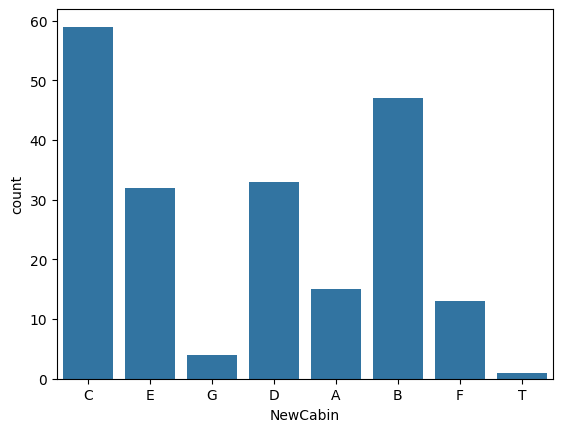

In [46]:
sns.countplot(x=df['NewCabin'])

In [47]:
cabingrp = df.groupby('Pclass')['NewCabin'].value_counts()
cabingrp

Pclass  NewCabin
1       C           59
        B           47
        D           29
        E           25
        A           15
        T            1
2       F            8
        D            4
        E            4
3       F            5
        G            4
        E            3
Name: count, dtype: int64

<Axes: xlabel='Pclass,NewCabin'>

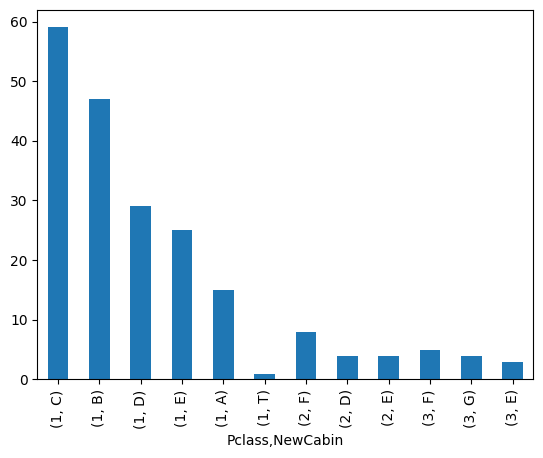

In [48]:
cabingrp.plot(kind='bar')

In [49]:
df.groupby(['Pclass','Survived'])['NewCabin'].describe()

count unique top freq
Pclass Survived                      
1      0           59      6   C   24
       1          117      5   C   35
2      0            3      3   F    1
       1           13      3   F    7
3      0            6      2   F    4
       1            6      3   E    3

In [50]:
df['NewCabin'] = df.groupby(['Pclass','Survived'])['NewCabin'].transform(lambda x: x.fillna(x.mode()[0]))

In [51]:
df['NewCabin'].unique()

array(['F', 'C', 'E', 'G', 'D', 'A', 'B', 'T'], dtype=object)

In [52]:
df['NewCabin'].value_counts()

NewCabin
F    453
E    145
D    127
C     80
B     66
A     15
G      4
T      1
Name: count, dtype: int64

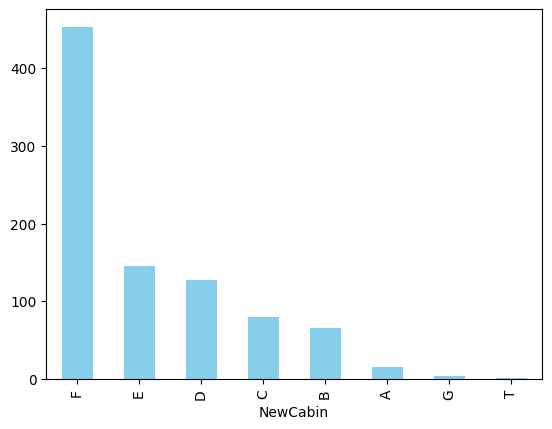

In [53]:
df['NewCabin'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

In [54]:
df['NewCabin']=df['NewCabin'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8})

In [55]:
df['NewCabin'].head()

0    6
1    3
2    5
3    3
4    6
Name: NewCabin, dtype: int64

In [56]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,NewCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,2,2,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,3,5,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,2,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,2,4,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,2,2,6
5,6,0,3,"Moran, Mr. James",0,25.0,0,0,330877,8.4583,NaN,3,2,2,6
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1,4,4,5
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,1,1,3,6
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,1,2,2,5
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,2,2,4,6


In [57]:
#Assigning and checking

In [58]:
df=df[['Survived', 'Pclass', 'Sex', 'Embarked', 'NewFare', 'NewAge','NewCabin','SibSp', 'Parch']]
df.head(10)

,Survived,Pclass,Sex,Embarked,NewFare,NewAge,NewCabin,SibSp,Parch
0,0,3,0,1,2,2,6,1,0
1,1,1,1,2,5,3,3,1,0
2,1,3,1,1,2,2,5,0,0
3,1,1,1,1,4,2,3,1,0
4,0,3,0,1,2,2,6,0,0
5,0,3,0,3,2,2,6,0,0
6,0,1,0,1,4,4,5,0,0
7,0,3,0,1,3,1,6,3,1
8,1,3,1,1,2,2,5,0,2
9,1,2,1,2,4,2,6,1,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   Embarked  891 non-null    int64   
 4   NewFare   891 non-null    category
 5   NewAge    891 non-null    category
 6   NewCabin  891 non-null    int64   
 7   SibSp     891 non-null    int64   
 8   Parch     891 non-null    int64   
dtypes: category(2), int64(7)
memory usage: 51.0 KB


In [60]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Embarked    0
NewFare     0
NewAge      0
NewCabin    0
SibSp       0
Parch       0
dtype: int64

In [61]:
x = df[['Pclass', 'Sex', 'NewAge', 'NewFare', 'Embarked','NewCabin','SibSp', 'Parch']]
y = df['Survived']

In [62]:
x.head()

,Pclass,Sex,NewAge,NewFare,Embarked,NewCabin,SibSp,Parch
0,3,0,2,2,1,6,1,0
1,1,1,3,5,2,3,1,0
2,3,1,2,2,1,5,0,0
3,1,1,2,4,1,3,1,0
4,3,0,2,2,1,6,0,0


In [63]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [64]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [65]:
x_train

,Pclass,Sex,NewAge,NewFare,Embarked,NewCabin,SibSp,Parch
331,1,0,4,3,1,3,0,0
733,2,0,2,2,1,4,0,0
382,3,0,2,2,1,6,0,0
704,3,0,2,2,1,6,1,0
813,3,1,1,4,1,6,4,2
...,...,...,...,...,...,...,...,...
106,3,1,2,2,1,5,0,0
270,1,0,3,4,1,3,0,0
860,3,0,3,2,1,6,2,0
435,1,1,2,5,1,2,1,2


In [66]:
len(x_train), len(y_train), len(x_test), len(y_test)

(712, 712, 179, 179)

In [67]:
#Model LR====================================================================

In [68]:
model_LR=LogisticRegression()

In [69]:
model_LR.fit(x_train, y_train)

LogisticRegression()

In [70]:
y_pred=model_LR.predict(x_test)

In [71]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [72]:
cm_LR=confusion_matrix(y_test, y_pred)
print(cm_LR)

[[91 14]
 [16 58]]


In [73]:
accuracy_LR=accuracy_score(y_test, y_pred)*100
print('LR accuracy:',accuracy_LR)

LR accuracy: 83.24022346368714


In [74]:
precision_LR=precision_score(y_test, y_pred)*100
print('LR precision score :', precision_LR)

LR precision score : 80.55555555555556


In [75]:
recall_LR=recall_score(y_test, y_pred)*100
print('LR Accuracy score is: ', recall_LR)

LR Accuracy score is:  78.37837837837837


In [76]:
fscore_LR=f1_score(y_test, y_pred)*100
print(fscore_LR)

79.45205479452055


In [77]:
LR_ClassReport=classification_report(y_test, y_pred)
print(LR_ClassReport)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [78]:
#Now naive Bayes=======================================================================================================

In [79]:
model_NB=GaussianNB()

In [80]:
model_NB.fit(x_train, y_train)

GaussianNB()

In [81]:
y_pred_NB=model_NB.predict(x_test)

In [82]:
accuracy_NB=accuracy_score(y_test, y_pred_NB)*100
print('NB Accuracy score is: ', accuracy_NB)

NB Accuracy score is:  75.97765363128491


In [83]:
precision_NB=precision_score(y_test, y_pred_NB)*100
print('NB Accuracy score is: ', precision_NB)

NB Accuracy score is:  66.66666666666666


In [84]:
recall_NB=recall_score(y_test, y_pred_NB)*100
print('NB Accuracy score is: ', recall_NB)

NB Accuracy score is:  83.78378378378379


In [85]:
fscore_NB=f1_score(y_test, y_pred_NB)*100
fscore_NB

74.25149700598801

In [86]:
cm_nb=confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix:')
print(cm_nb)

Confusion Matrix:
[[74 31]
 [12 62]]


In [87]:
NB_ClassReport=classification_report(y_test, y_pred_NB)
print(NB_ClassReport)

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       105
           1       0.67      0.84      0.74        74

    accuracy                           0.76       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.76      0.76       179



In [88]:
#Decision Tree==================================================================

In [89]:
model_dtc=DTC(max_depth=5)

In [90]:
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [91]:
y_pred_dtc=model_dtc.predict(x_test)

In [92]:
dtc_cm=confusion_matrix(y_test, y_pred_dtc)
print(dtc_cm)

[[104   1]
 [ 15  59]]


In [93]:
accuracy_dt=accuracy_score(y_test, y_pred_dtc)*100
accuracy_dt

91.06145251396647

In [94]:
precision_dt=precision_score(y_test, y_pred_dtc)*100
precision_dt

98.33333333333333

In [95]:
recall_dt=recall_score(y_test, y_pred_dtc)*100
recall_dt

79.72972972972973

In [96]:
fscore_dt=f1_score(y_test, y_pred_dtc)*100
fscore_dt

88.05970149253731

In [97]:
dtc_class_report=classification_report(y_test, y_pred_dtc)
print(dtc_class_report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       105
           1       0.98      0.80      0.88        74

    accuracy                           0.91       179
   macro avg       0.93      0.89      0.90       179
weighted avg       0.92      0.91      0.91       179



In [98]:
#Random Forest==========================================================================================

In [99]:
model_rfc=RFC(max_depth=5)

In [100]:
model_rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [101]:
y_pred_rfc=model_rfc.predict(x_test)

In [102]:
y_pred_rfc

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0])

In [103]:
rfc_cm=confusion_matrix(y_test, y_pred_rfc)
print(rfc_cm)

[[100   5]
 [ 14  60]]


In [104]:
accuracy_rf = accuracy_score(y_test, y_pred_rfc)*100
accuracy_rf

89.3854748603352

In [105]:
precision_rf=precision_score(y_test, y_pred_rfc)*100
precision_rf

92.3076923076923

In [106]:
recall_rf=recall_score(y_test, y_pred_rfc)*100
recall_rf

81.08108108108108

In [107]:
fscore_rf=f1_score(y_test,y_pred_rfc)*100
fscore_rf

86.33093525179856

In [108]:
rfc_class_report=classification_report(y_test, y_pred_rfc)
print(rfc_class_report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       105
           1       0.92      0.81      0.86        74

    accuracy                           0.89       179
   macro avg       0.90      0.88      0.89       179
weighted avg       0.90      0.89      0.89       179



In [109]:
#SUpport vector Classifier=========================================================================

In [110]:
model_svm=SVC()

In [111]:
model_svm.fit(x_train, y_train)

SVC()

In [112]:
y_pred_svc=model_svm.predict(x_test)
y_pred_svc

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

In [113]:
svc_cm=confusion_matrix(y_test, y_pred_svc)
print(svc_cm)

[[92 13]
 [24 50]]


In [114]:
accuracy_svc=accuracy_score(y_test, y_pred_svc)*100
accuracy_svc

79.3296089385475

In [115]:
precision_svc=precision_score(y_test, y_pred_svc)*100
precision_svc

79.36507936507937

In [116]:
fscore_svc=f1_score(y_test, y_pred_svc)*100
fscore_svc

72.99270072992701

In [117]:
recall_svc=recall_score(y_test, y_pred_svc)*100
recall_svc

67.56756756756756

In [118]:
svc_class_report=classification_report(y_test, y_pred_svc)
print(svc_class_report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [119]:
#KNN===========================================================================

In [120]:
model_knn=KNN()

In [121]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [122]:
y_pred_knn=model_knn.predict(x_test)
print(y_pred_knn)

[0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0]


In [123]:
knn_cm=confusion_matrix(y_test, y_pred_knn)
print(knn_cm)

[[100   5]
 [ 15  59]]


In [124]:
accuracy_knn=accuracy_score(y_test, y_pred_knn)*100
accuracy_knn

88.8268156424581

In [125]:
precision_knn=precision_score(y_test, y_pred_knn)*100
precision_knn

92.1875

In [126]:
recall_knn=recall_score(y_test, y_pred_knn)*100
recall_knn

79.72972972972973

In [127]:
fscore_knn=f1_score(y_test, y_pred_knn)*100
fscore_knn

85.5072463768116

In [128]:
knn_class_report=classification_report(y_test, y_pred_knn)
print(knn_class_report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       105
           1       0.92      0.80      0.86        74

    accuracy                           0.89       179
   macro avg       0.90      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179



In [129]:
# =========================================================================================================================================================

In [130]:
models=['Logistic', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'SVC', 'KNN']
accuracy_scores=[accuracy_LR, accuracy_NB, accuracy_dt, accuracy_rf ,accuracy_svc, accuracy_knn]
print(accuracy_scores)

[83.24022346368714, 75.97765363128491, 91.06145251396647, 89.3854748603352, 79.3296089385475, 88.8268156424581]


Text(0.5, 1.0, 'Accuracy Scores of Different Models')

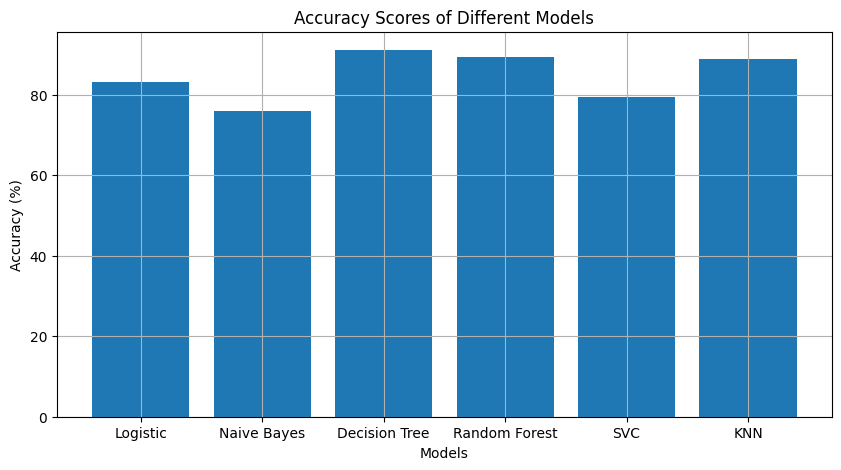

In [131]:
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_scores)

plt.grid()
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Scores of Different Models')

In [132]:
recall_score=[recall_LR, recall_NB, recall_dt, recall_rf, recall_svc, recall_knn]

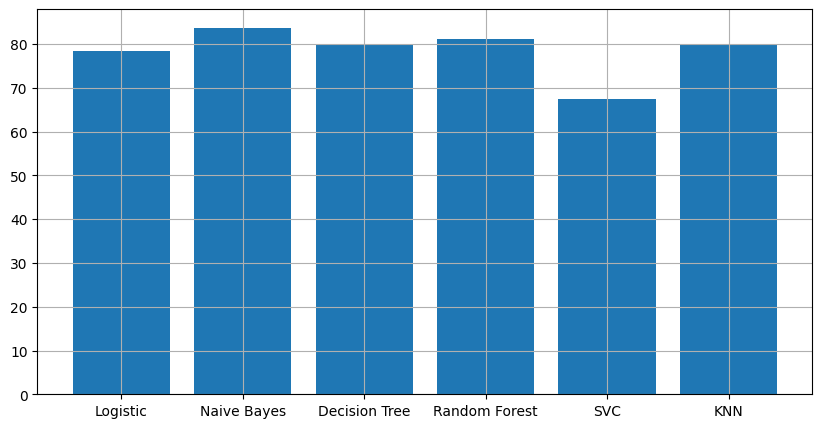

In [133]:
plt.figure(figsize=(10,5))
plt.bar(models, recall_score)
plt.grid()


In [134]:
precision_score=[precision_LR, precision_NB, precision_dt, precision_rf, precision_svc, precision_knn]
print(precision_score)

[80.55555555555556, 66.66666666666666, 98.33333333333333, 92.3076923076923, 79.36507936507937, 92.1875]


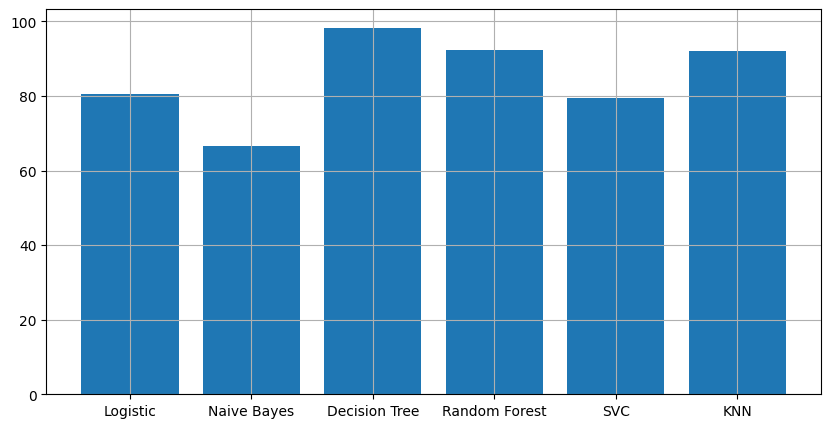

In [135]:
plt.figure(figsize=(10,5))
plt.bar(models, precision_score)
plt.grid()

In [136]:
f1_scores=[fscore_LR, fscore_NB, fscore_dt, fscore_rf, fscore_svc, fscore_knn]
print(precision_score)

[80.55555555555556, 66.66666666666666, 98.33333333333333, 92.3076923076923, 79.36507936507937, 92.1875]


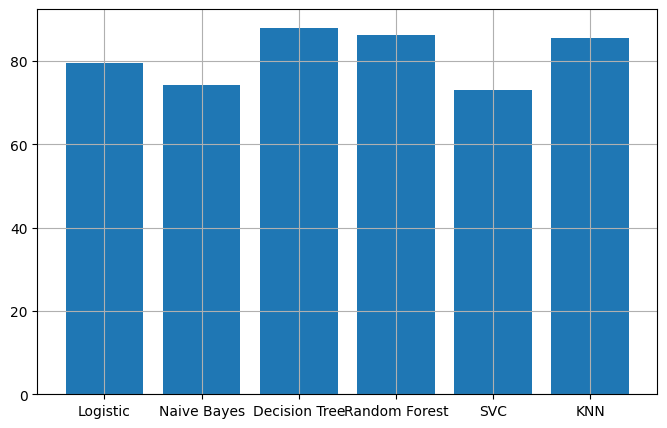

In [137]:
plt.figure(figsize=(8,5))
plt.bar(models, f1_scores)
plt.grid()